In [2]:
import polars as pl
from polars import DataFrame
from label_legends.result import calculate_scores
from label_legends.util import ROOT

import altair


# altair.renderers.enable("png") # browser
altair.renderers.enable("browser") # browser

pl.Config.set_tbl_cols(20)
pl.Config.set_tbl_rows(100)

polars.config.Config

In [3]:
scores = pl.read_csv(ROOT / "resource" / "ensemble_scores.csv").sort("recall", descending=True)
scores.head(100)

model,precision,recall,fscore,accuracy,tp,tn,fp,fn
str,f64,f64,f64,f64,i64,i64,i64,i64
"""female""",0.324784,0.963403,0.485795,0.470583,3001,2646,6239,114
"""negative""",0.35041,0.836597,0.493935,0.555,2606,4054,4831,509
"""female_negative""",0.43052,0.820546,0.564737,0.671667,2556,5504,3381,559
"""swear""",0.39873,0.806421,0.533617,0.634083,2512,5097,3788,603
"""ensemble""",0.536422,0.74703,0.624447,0.76675,2327,6874,2011,788


In [12]:
predictions = pl.read_csv(ROOT / "resource" / "ensemble_predictions.csv").with_columns(pl.struct(["pred_female", "pred_swear"]).map_elements(lambda x: x["pred_female"] and x["pred_swear"], return_dtype=pl.Int64).alias("pred_female_swear"))

predictions.head(100)

id,type,label,deberta,female,pred_female,negative,pred_negative,pred_female_negative,swear,pred_swear,pred_ensemble
i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
100,"""tp""",1,1,1,1,0,1,1,0,1,1
10005,"""tn""",0,0,1,1,1,1,1,1,1,1
10006,"""tn""",0,0,1,1,1,1,1,1,1,1
10007,"""tn""",0,0,1,1,1,1,1,1,1,1
10008,"""tn""",0,0,1,1,1,1,1,1,1,1
10009,"""tn""",0,0,1,1,1,1,1,1,1,1
10010,"""tn""",0,0,1,1,1,1,1,1,1,1
10038,"""tn""",0,0,1,1,0,0,0,0,0,0
10039,"""tn""",0,0,1,1,0,0,0,0,0,0


In [ ]:
# scores_ensemble = calculate_scores(predictions["label"], predictions["pred_ensemble"])
# scores_ensemble

# scores_female_swear = calculate_scores(predictions["label"], predictions["pred_female_swear"])
# scores_female_swear
#
# pl.concat([scores, DataFrame([s for s in [{"model": "pred_ensemble"} | scores_ensemble.asdict(), {"model": "pred_female_swear"} | scores_female_swear.asdict()]])]).write_csv(ROOT / "resource" / "ensemble_scores.csv")

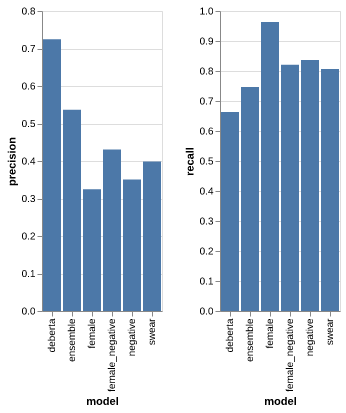

In [11]:

scores = scores.sort("fscore", descending=True)
def barplot(measure: str):
    return altair.Chart(scores).mark_bar().encode(altair.X("model:N", sort=altair.EncodingSortField(field="fscore", order="descending")), altair.Y(measure), color="model")


cols = ["fscore", "recall", "precision", "fn", "fp"] #, "accuracy"]# , "tp", "tn", "fp", "fn"]
charts = map(barplot, cols)

combined_chart = altair.hconcat(*charts, title="Performance metrics for ensemble models based on DeBERTa").configure_title(fontSize=20, anchor="middle").configure_axis(labelFontSize=15, titleFontSize=15).configure_legend(labelFontSize=15, titleFontSize=15).show()

In [ ]:
def selectivity_ratios(model: str):
    return (predictions.group_by("type", model).len()
        .with_columns((pl.col("len") / pl.sum("len").over("type")).alias("frac"))
        .with_columns(pl.lit(model).alias("model"))
        .filter(pl.col("type").is_in(["fn", "tn"]))
        .filter(pl.col(model) == 1)
        .sort("len").rename({"len": "samples"})
        .select("model", "type", "frac", "samples")
    )
models = ["female", "negative", "swear", "pred_female_negative", "pred_female_swear", "pred_ensemble"]
sel_ratios = pl.concat(map(selectivity_ratios, models))

def frac_chart(model: str, scale: str = "frac"):
    return altair.Chart(sel_ratios.filter(pl.col("model") == model)).mark_bar().encode(altair.X("type", sort=altair.EncodingSortField(field="frac", order="descending"), title=model), altair.Y(scale), color="type")

frac_charts = map(frac_chart, models)
combined_chart = altair.hconcat(*frac_charts, title="Fraction of reconsidered samples").configure_title(fontSize=20, anchor="middle").configure_axis(labelFontSize=15, titleFontSize=15).configure_legend(labelFontSize=15, titleFontSize=15).show()